In [1]:
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
i = 0
j = 0
img = []
for image in glob.glob("C:/Users/Priyanshu/Desktop/Positive/*.jpg"):
    n = cv2.imread(image)
    img.append(n)
    if (i/2000 == j):
        print(str(j*10) + " percent complete")
        j = j+1
    i = i+1
print("100 percent complete........Bro ho gya ;-)")

0 percent complete
10 percent complete
20 percent complete
30 percent complete
40 percent complete
50 percent complete
60 percent complete
70 percent complete
80 percent complete
90 percent complete
100 percent complete........Bro ho gya ;-)


In [3]:
positives = np.array(img)
print(positives.shape)

(20000, 227, 227, 3)


In [4]:
i = 0
j = 0
img = []
for image in glob.glob("C:/Users/Priyanshu/Desktop/Negative/*.jpg"):
    n = cv2.imread(image)
    img.append(n)
    if (i/2000 == j):
        print(str(j*10) + " percent complete")
        j = j+1
    i = i+1
print("100 percent complete........Bro ho gya ;-)")

0 percent complete
10 percent complete
20 percent complete
30 percent complete
40 percent complete
50 percent complete
60 percent complete
70 percent complete
80 percent complete
90 percent complete
100 percent complete........Bro ho gya ;-)


In [5]:
negatives = np.array(img)
print(negatives.shape)

(20000, 227, 227, 3)


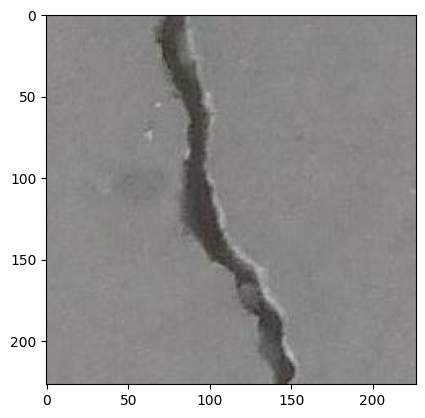

In [6]:
plt.imshow(positives[0])

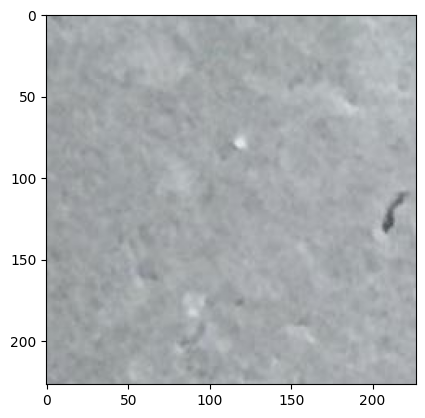

In [7]:
plt.imshow(negatives[0])

In [8]:
neg = np.zeros(20000)
pos = neg+1

In [9]:
print(neg.shape)
print(pos.shape)

(20000,)
(20000,)


In [10]:
print(neg)
print(pos)

[0. 0. 0. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 1.]


In [11]:
x_set = np.concatenate((positives, negatives), axis = 0)
y_set = np.concatenate((pos, neg), axis = 0)

In [12]:
print(x_set.shape)
print(y_set.shape)

(40000, 227, 227, 3)
(40000,)


In [13]:
y_set.reshape(40000)
print(y_set.shape)

(40000,)


In [14]:
temp = list(zip(x_set, y_set))
random.shuffle(temp)
res1, res2 = zip(*temp)
res1, res2 = list(res1), list(res2)
x_set = np.array(res1)
y_set = np.array(res2)

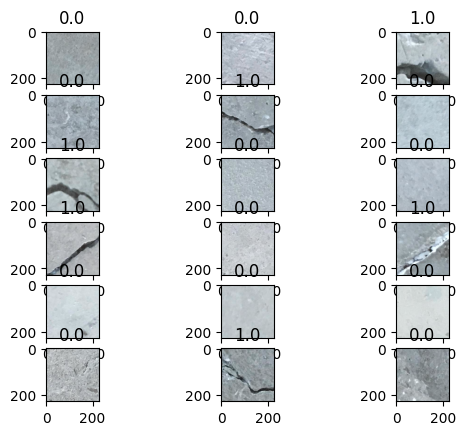

In [15]:
figure, axis = plt.subplots(6, 3)
i = 0
for x in range(0, 6):
    for y in range(0, 3):
        axis[x, y].imshow(x_set[i])
        axis[x, y].set_title(y_set[i])
        i = i+1

In [16]:
x_train = x_set[0:36000, :, :, :]
x_test = x_set[36000:, :, :, :]
y_train = y_set[0:36000]
y_test = y_set[36000:]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(36000, 227, 227, 3)
(4000, 227, 227, 3)
(36000,)
(4000,)


In [17]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [24]:
model = keras.Sequential([
                          keras.layers.Rescaling(1./255, input_shape = (227, 227, 3)),
                          keras.layers.Flatten(input_shape=(227, 227, 3)),
                          keras.layers.Dense(200, activation='relu'),
                          keras.layers.Dense(200, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [25]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 164s 145ms/step - loss: 2.0652 - accuracy: 0.7334
Epoch 2/10
1125/1125 [==============================] - 165s 147ms/step - loss: 0.3890 - accuracy: 0.8365
Epoch 3/10
1125/1125 [==============================] - 166s 147ms/step - loss: 0.3424 - accuracy: 0.8592
Epoch 4/10
1125/1125 [==============================] - 162s 144ms/step - loss: 0.3415 - accuracy: 0.8615
Epoch 5/10
1125/1125 [==============================] - 160s 143ms/step - loss: 0.3393 - accuracy: 0.8642
Epoch 6/10
1125/1125 [==============================] - 160s 142ms/step - loss: 0.3088 - accuracy: 0.8782
Epoch 7/10
1125/1125 [==============================] - 158s 140ms/step - loss: 0.3214 - accuracy: 0.8763
Epoch 8/10
1125/1125 [==============================] - 159s 141ms/step - loss: 0.3157 - accuracy: 0.8787
Epoch 9/10
1125/1125 [==============================] - 159s 141ms/step - loss: 0.3883 - accuracy: 0.8409
Epoch 10/10
1125/1125 [=======================

In [27]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

125/125 [==============================] - 6s 39ms/step - loss: 0.3116 - accuracy: 0.9040
0.9039999842643738
